In [4]:
# import dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read csvs into DF

org_profile = pd.read_csv('Data/organization_profiles.csv')

tweets1 = pd.read_csv('Data/tweets_all_revised2.csv')

tweets2 = pd.read_excel('Data/tweets_all_revised2.xlsx')

/home/douglas/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
org_profile

,Unnamed: 0,Organization Name,twitter_handle,screen_name,agency_catergory,followers_count,friends_count,location
0,0,Adults In Motion,@AIMkitchener,AIMkitchener,Disabilities,662,800,"Kitchener, Ontario"
1,1,African Family Revival Organization,@AFROKitchener,AFROKitchener,"Arts, Culture and Heritage",125,64,"Kitchener, Ontario"
2,2,Alzheimer Society of Waterloo Wellington,@alzsocww,alzsocww,Seniors,1376,432,"Waterloo Wellington, Ontario"
3,3,Big Brothers Big Sisters of Waterloo Region,@BBBSWR,BBBSWR,"Children, Youth and Family",2462,1551,Waterloo Region
4,4,Bridges to Belonging,@BtoBelonging,BtoBelonging,Disabilities,1432,1254,Waterloo Region
...,...,...,...,...,...,...,...,...
81,81,The Museum,@THEMUSEUM,THEMUSEUM,"Arts, Culture and Heritage",18095,6858,"Kitchener, Ontario, Canada"
82,82,Kitchener-Waterloo Community Foundation,@thekwcf,thekwcf,Community and Social Services,4427,782,"Kitchener-Waterloo, Ontario"
83,83,The Working Centre,@Workingcentre,Workingcentre,Community and Social Services,2905,256,Kitchener
84,84,WorkforceBoardofWWD,@WorkforceWWD,WorkforceWWD,Employment,441,406,Waterloo Wellington Dufferin


In [19]:
## find average tweets per industry
## join tweets and organization
##on tweets all, aggregate all tweets per type of organization

organization_combined = pd.merge(tweets1, org_profile, how='left', on='screen_name')
organization_combined = organization_combined[['screen_name','favorite_count','retweet_count', 'agency_catergory','followers_count','friends_count']]
organization_combined.head()


,screen_name,favorite_count,retweet_count,agency_catergory,followers_count,friends_count
0,AIMkitchener,2.0,0.0,Disabilities,662,800
1,AIMkitchener,1.0,0.0,Disabilities,662,800
2,AIMkitchener,1.0,0.0,Disabilities,662,800
3,AIMkitchener,1.0,0.0,Disabilities,662,800
4,AIMkitchener,1.0,0.0,Disabilities,662,800


In [20]:
sector_number = org_profile.groupby('agency_catergory', as_index=False)['Organization Name'].count()
sector_number.head()

,agency_catergory,Organization Name
0,Animals,2
1,"Arts, Culture and Heritage",11
2,"Children, Youth and Family",10
3,Community and Social Services,21
4,Criminal Justice and Civil Rights,2


In [21]:
organization_combined = organization_combined.groupby('agency_catergory', as_index=False).sum()
organization_combined.head()

,agency_catergory,favorite_count,retweet_count,followers_count,friends_count
0,Animals,11934.0,4853.0,16298283,1528144
1,"Arts, Culture and Heritage",23674.0,2039878.0,131267994,48739200
2,"Children, Youth and Family",43131.0,477596.0,66230913,37771144
3,Community and Social Services,86672.0,4145443.0,166018118,52742760
4,Criminal Justice and Civil Rights,6614.0,2305325.0,29686425,13558965


In [22]:
organization_combined = pd.merge(organization_combined, sector_number, how='left', on='agency_catergory')
organization_combined.head()

,agency_catergory,favorite_count,retweet_count,followers_count,friends_count,Organization Name
0,Animals,11934.0,4853.0,16298283,1528144,2
1,"Arts, Culture and Heritage",23674.0,2039878.0,131267994,48739200,11
2,"Children, Youth and Family",43131.0,477596.0,66230913,37771144,10
3,Community and Social Services,86672.0,4145443.0,166018118,52742760,21
4,Criminal Justice and Civil Rights,6614.0,2305325.0,29686425,13558965,2


In [23]:
organization_combined['favorite_count_per_org'] = organization_combined['favorite_count'] / organization_combined['Organization Name']
organization_combined['retweet_per_org'] = organization_combined['retweet_count'] / organization_combined['Organization Name']
organization_combined['follower_per_org'] = organization_combined['followers_count'] / organization_combined['Organization Name']
organization_combined['friends_per_org'] = organization_combined['friends_count'] / organization_combined['Organization Name']
organization_combined = organization_combined[['agency_catergory','favorite_count_per_org', 'retweet_per_org', 'follower_per_org','friends_per_org']] 
organization_combined

,agency_catergory,favorite_count_per_org,retweet_per_org,follower_per_org,friends_per_org
0,Animals,5967.000000,2.426500e+03,8.149142e+06,7.640720e+05
1,"Arts, Culture and Heritage",2152.181818,1.854435e+05,1.193345e+07,4.430836e+06
2,"Children, Youth and Family",4313.100000,4.775960e+04,6.623091e+06,3.777114e+06
3,Community and Social Services,4127.238095,1.974020e+05,7.905625e+06,2.511560e+06
4,Criminal Justice and Civil Rights,3307.000000,1.152662e+06,1.484321e+07,6.779482e+06
5,Disabilities,3017.100000,2.494635e+05,4.352318e+06,2.317588e+06
6,Education Institution,1986.000000,3.372000e+03,1.407182e+06,1.442919e+06
7,Employment,4523.000000,7.188500e+03,4.059742e+07,1.037007e+06
8,Environment,1698.000000,1.666100e+04,4.621430e+06,1.423317e+06
9,Grant-Giving Foundation,1644.000000,4.028850e+04,3.091726e+06,2.873278e+06


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

<Figure size 720x360 with 0 Axes>

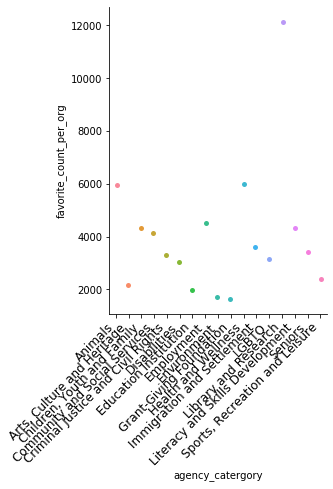

In [24]:
plt.figure(figsize=(10,5))
chart = sns.catplot(x="agency_catergory", y="favorite_count_per_org", data=organization_combined)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

<Figure size 720x360 with 0 Axes>

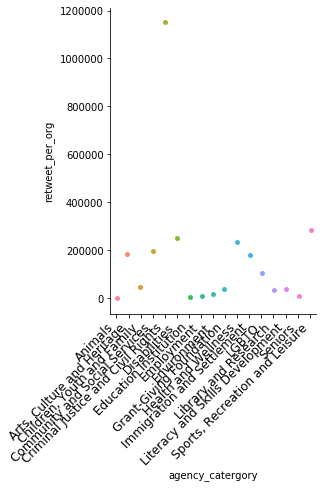

In [25]:
plt.figure(figsize=(10,5))
chart = sns.catplot(x="agency_catergory", y="retweet_per_org", data=organization_combined)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

<Figure size 720x360 with 0 Axes>

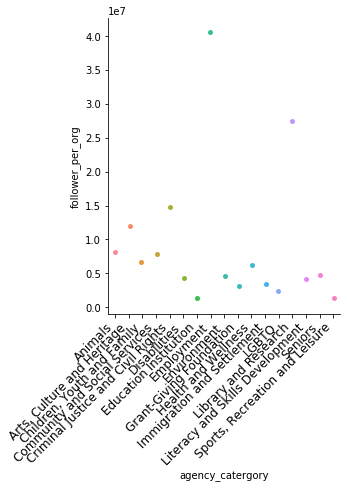

In [26]:
plt.figure(figsize=(10,5))
chart = sns.catplot(x="agency_catergory", y="follower_per_org", data=organization_combined)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

<Figure size 720x360 with 0 Axes>

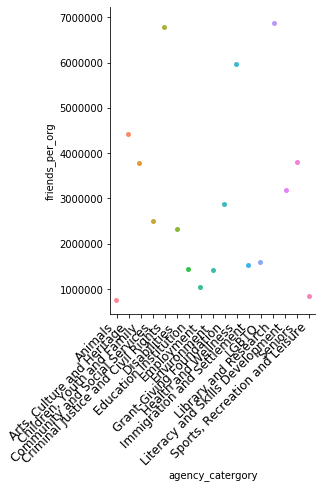

In [27]:
plt.figure(figsize=(10,5))
chart = sns.catplot(x="agency_catergory", y="friends_per_org", data=organization_combined)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

In [30]:
df_tweets1 = tweets1

In [31]:
#need to create a column - hashtag empty
df_tweets1['hashashtag'] = np.where(df_tweets1['hashtags']!= '[]', True, False)
df_tweets1

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean,hashashtag
0,0,885747516,2021-02-26 17:59:51,AIMkitchener,🍅 What will your garden look like this year? 🪴...,['https://t.co/g1djW5JMVT'],2.0,0.0,https://twitter.com/i/web/status/1365360946378...,[],False,False,False,False,Adults In Motion,What will your garden look like this year \n...,False
1,1,885747516,2021-02-24 19:34:45,AIMkitchener,"Virtual connecting is not the next big thing, ...",['https://t.co/b1Ts6V60hS'],1.0,0.0,https://twitter.com/i/web/status/1364660054046...,[],False,False,False,False,Adults In Motion,Virtual connecting is not the next big thing i...,False
2,2,885747516,2021-02-15 18:14:22,AIMkitchener,“Treat your friends like family and your famil...,['https://t.co/jpFQ3K5oSK'],1.0,0.0,https://twitter.com/i/web/status/1361378331254...,[],False,False,False,False,Adults In Motion,“Treat your friends like family and your famil...,False
3,3,885747516,2021-02-01 17:54:56,AIMkitchener,🤗 Sending virtual Love Squeezes to anyone who ...,['https://t.co/zk4ZZm0cZa'],1.0,0.0,https://twitter.com/i/web/status/1356300010737...,"['VirtualHug', 'SpreadKindness', 'SpreadLove']",False,False,False,False,Adults In Motion,Sending virtual Love Squeezes to anyone who n...,True
4,4,885747516,2021-01-15 18:40:36,AIMkitchener,How are YOU getting active and outdoors?! Tell...,['https://t.co/eZB1kEPYUz'],1.0,0.0,NaN,[],True,False,False,False,Adults In Motion,How are YOU getting active and outdoors Tell u...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184738,184742,994921098260213760,2018-09-26 01:28:44,dataforgoodwr,We were really happy to join @dataforgoodyyz a...,['https://t.co/EhOsdVo0fk'],2.0,0.0,https://twitter.com/i/web/status/1044760651112...,[],False,True,False,False,Data For Good,We were really happy to join dataforgoodyyz at...,False
184739,184743,994921098260213760,2018-09-26 01:22:20,dataforgoodwr,RT @dataforgoodyyz: We're happy to see the dat...,[],0.0,3.0,NaN,[],False,False,False,True,Data For Good,Were happy to see the data venture spreading a...,False
184740,184744,994921098260213760,2018-09-18 01:23:13,dataforgoodwr,@Data_for_Good @dataforgoodyyz https://t.co/7r...,['https://t.co/7rGBtUfOuK'],1.0,0.0,https://twitter.com/dataforgoodwr/status/10418...,[],False,True,False,False,Data For Good,DataforGood dataforgoodyyz,False
184741,184745,994921098260213760,2018-09-18 01:15:06,dataforgoodwr,We are live! If you live in Waterloo Region a...,['https://t.co/At80jnEQtt'],9.0,5.0,https://twitter.com/i/web/status/1041858116181...,[],False,False,False,False,Data For Good,We are live If you live in Waterloo Region an...,False


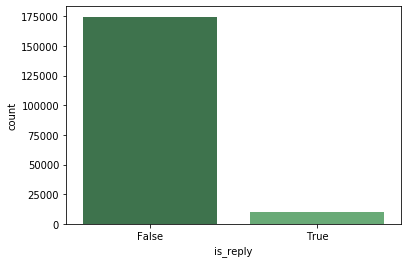

In [44]:
sns.countplot(x="is_reply", data=df_tweets1, palette="Greens_d")

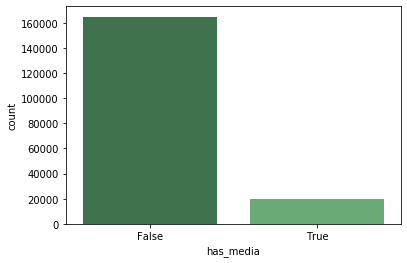

In [46]:
sns.countplot(x="has_media", data=df_tweets1, palette="Greens_d")b

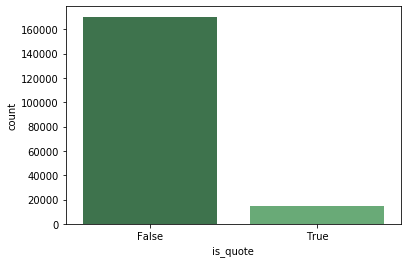

In [49]:
sns.countplot(x="is_quote", data=df_tweets1, palette="Greens_d")

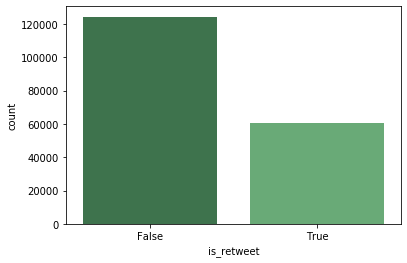

In [50]:
sns.countplot(x="is_retweet", data=df_tweets1, palette="Greens_d")

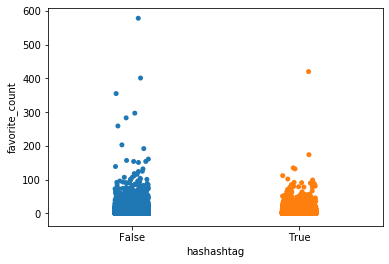

In [34]:
sns.stripplot(x="hashashtag", y="favorite_count", data=df_tweets1) 

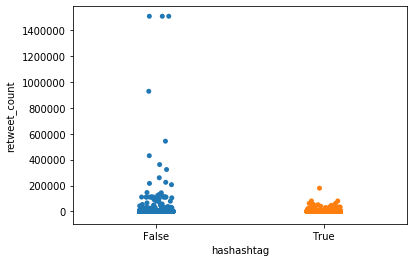

In [36]:
sns.stripplot(x="hashashtag", y="retweet_count", data=df_tweets1)

In [40]:
#remove is retweet
df_tweets1_no_retweet = df_tweets1[df_tweets1.is_retweet == False ]
df_tweets1_no_retweet.describe

<bound method NDFrame.describe of         tweet_id             user_id           created_at    screen_name  \
0              0           885747516  2021-02-26 17:59:51   AIMkitchener   
1              1           885747516  2021-02-24 19:34:45   AIMkitchener   
2              2           885747516  2021-02-15 18:14:22   AIMkitchener   
3              3           885747516  2021-02-01 17:54:56   AIMkitchener   
4              4           885747516  2021-01-15 18:40:36   AIMkitchener   
...          ...                 ...                  ...            ...   
184735    184739  994921098260213760  2018-10-17 22:49:52  dataforgoodwr   
184738    184742  994921098260213760  2018-09-26 01:28:44  dataforgoodwr   
184740    184744  994921098260213760  2018-09-18 01:23:13  dataforgoodwr   
184741    184745  994921098260213760  2018-09-18 01:15:06  dataforgoodwr   
184742    184746  994921098260213760  2018-09-18 01:13:43  dataforgoodwr   

                                                     

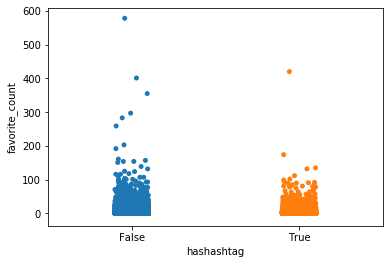

In [41]:
sns.stripplot(x="hashashtag", y="favorite_count", data=df_tweets1_no_retweet) 

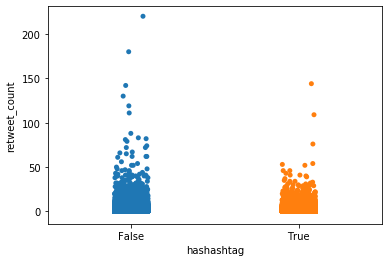

In [42]:
sns.stripplot(x="hashashtag", y="retweet_count", data=df_tweets1_no_retweet)

In [ ]:
sns.countplot(x="hashashtag", data=df_tweets1, palette="Greens_d")

In [45]:
#average favourites/retweet per divisions - is quote etc


In [78]:
#take tweets1 dataframe
#remove non-hashtags 
df_hashtag = tweets1
df_hashtag['hashashtag'] = np.where(df_hashtag['hashtags']!= '[]', True, False)
df_hashtag.describe

<bound method NDFrame.describe of         tweet_id             user_id           created_at    screen_name  \
0              0           885747516  2021-02-26 17:59:51   AIMkitchener   
1              1           885747516  2021-02-24 19:34:45   AIMkitchener   
2              2           885747516  2021-02-15 18:14:22   AIMkitchener   
3              3           885747516  2021-02-01 17:54:56   AIMkitchener   
4              4           885747516  2021-01-15 18:40:36   AIMkitchener   
...          ...                 ...                  ...            ...   
184738    184742  994921098260213760  2018-09-26 01:28:44  dataforgoodwr   
184739    184743  994921098260213760  2018-09-26 01:22:20  dataforgoodwr   
184740    184744  994921098260213760  2018-09-18 01:23:13  dataforgoodwr   
184741    184745  994921098260213760  2018-09-18 01:15:06  dataforgoodwr   
184742    184746  994921098260213760  2018-09-18 01:13:43  dataforgoodwr   

                                                     

In [79]:
#group by category and retweet-----, sum retweet and favourites
#graph by retweet as x, graph by y by hashtag
df_hashtag_average = df_hashtag.groupby(['is_retweet','hashtags']).mean().reset_index()

In [80]:
df_hashtag_top_favourite_average = df_hashtag_average.sort_values(by='favorite_count', ascending=False).groupby(['is_retweet']).head(15)
df_hashtag_top_favourite_average.head(30)

,is_retweet,hashtags,tweet_id,user_id,favorite_count,retweet_count,hashashtag
5268,False,['NotreDame'],94416.0,7.837868e+07,174.0,53.0,True
2845,False,"['GlobalClimateStrike', 'climatestrikecanada',...",155882.0,1.385124e+08,135.0,35.0,True
85,False,['2009v2019'],89492.0,4.251189e+08,132.0,8.0,True
7081,False,"['TorontoRaptors', 'NBAFinals', 'Game4', 'WeTh...",156008.0,1.385124e+08,94.0,18.0,True
6243,False,"['SheIsYourNeighbour', 'SheIsYourNeighbour']",163300.0,1.853194e+08,92.0,46.0,True
672,False,['BernieSanders'],111638.0,9.722683e+07,89.0,16.0,True
12400,False,"['streetscape', 'wrawesome', 'chooselocal']",155904.0,1.385124e+08,88.0,6.0,True
10892,False,['lemonadestand'],79017.0,2.295743e+08,77.0,5.0,True
12859,False,"['uptownwaterloo', 'kwawesome', 'wrawesome', '...",155859.0,1.385124e+08,66.0,3.5,True
3366,False,['IReadCanadianDay'],89238.0,4.251189e+08,57.0,13.0,True


[Text(0, 0, "['NotreDame']"),
 Text(0, 0, "['GlobalClimateStrike', 'climatestrikecanada', 'kwawesome', 'wrawesome']"),
 Text(0, 0, "['2009v2019']"),
 Text(0, 0, "['TorontoRaptors', 'NBAFinals', 'Game4', 'WeTheNorth']"),
 Text(0, 0, "['SheIsYourNeighbour', 'SheIsYourNeighbour']"),
 Text(0, 0, "['BernieSanders']"),
 Text(0, 0, "['streetscape', 'wrawesome', 'chooselocal']"),
 Text(0, 0, "['lemonadestand']"),
 Text(0, 0, "['uptownwaterloo', 'kwawesome', 'wrawesome', 'chooselocal']"),
 Text(0, 0, "['IReadCanadianDay']"),
 Text(0, 0, "['KMHAplayers']"),
 Text(0, 0, "['ChristmasHamper', 'StrongerTogether']"),
 Text(0, 0, "['OperationInspiration', 'WeAreInThisTogether', 'healthcareheroes']"),
 Text(0, 0, "['WeAreInThisTogether', 'StayHome', 'StaySafe', 'ourcmh']"),
 Text(0, 0, "['215Children']"),
 Text(0, 0, "['Ontario', 'IBelong']"),
 Text(0, 0, "['UofGJF16']"),
 Text(0, 0, "['IDPD2014']"),
 Text(0, 0, "['globalaccess2015']"),
 Text(0, 0, "['theatreishere']"),
 Text(0, 0, "['refugee', 'cdnimm

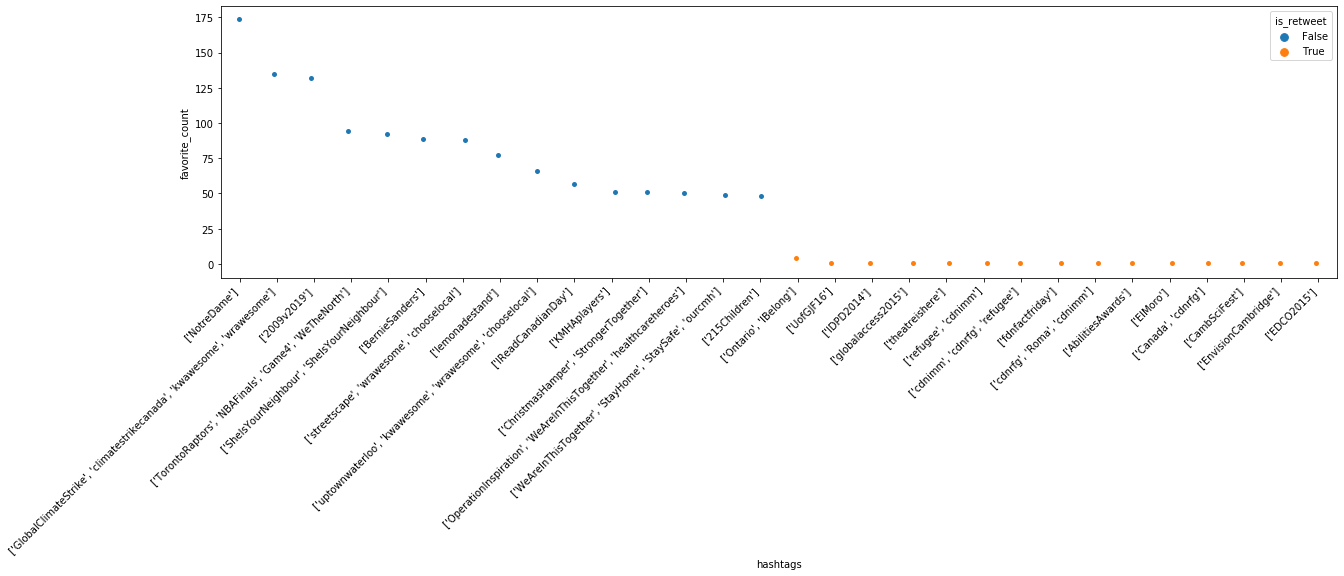

In [81]:
plt.figure(figsize=(20,5))

chart = sns.stripplot(x="hashtags",y="favorite_count",hue='is_retweet',data=df_hashtag_top_favourite_average)


chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [82]:
df_hashtag_top_retweet_average = df_hashtag_average.sort_values(by='retweet_count', ascending=False).groupby(['is_retweet']).head(15)
df_hashtag_top_retweet_average.head(30)

,is_retweet,hashtags,tweet_id,user_id,favorite_count,retweet_count,hashashtag
22730,True,"['coronavirus', 'DontBeASpreader']",36156.00,9.177840e+08,0.0,179470.00,True
20249,True,['TIMEPOY'],84488.00,2.421971e+08,0.0,80962.00,True
14291,True,"['BreonnaTaylor', 'SayHerName']",112920.00,9.722683e+07,0.0,52038.00,True
14114,True,"['BellLetsTalk', 'endthestigma', 'mentalillness']",7394.00,1.910675e+08,0.0,30698.00,True
19354,True,['Raptors'],95850.00,2.484730e+09,0.0,30636.00,True
14119,True,"['BellLetsTalk', 'mentalillness']",80590.00,2.295743e+08,0.0,22452.00,True
14501,True,"['COVID19', 'coronavirus']",85222.50,1.423876e+08,0.0,21326.50,True
16341,True,"['GordDownie', 'BrainCancer', 'TheHip']",22425.00,1.915693e+08,0.0,19855.00,True
26355,True,['womensmarch2018'],134952.00,2.470929e+08,0.0,17988.00,True
14105,True,"['BellLetsTalk', 'MentalHealth']",77085.65,1.289528e+09,0.0,17875.65,True


[Text(0, 0, "['coronavirus', 'DontBeASpreader']"),
 Text(0, 0, "['TIMEPOY']"),
 Text(0, 0, "['BreonnaTaylor', 'SayHerName']"),
 Text(0, 0, "['BellLetsTalk', 'endthestigma', 'mentalillness']"),
 Text(0, 0, "['Raptors']"),
 Text(0, 0, "['BellLetsTalk', 'mentalillness']"),
 Text(0, 0, "['COVID19', 'coronavirus']"),
 Text(0, 0, "['GordDownie', 'BrainCancer', 'TheHip']"),
 Text(0, 0, "['womensmarch2018']"),
 Text(0, 0, "['BellLetsTalk', 'MentalHealth']"),
 Text(0, 0, "['JerseysForHumboldt', 'HumboldtStrong']"),
 Text(0, 0, "['Paris']"),
 Text(0, 0, "['TransRightsAreHumanRights']"),
 Text(0, 0, "['GivingTuesdayCA', 'CIBCMiracleDay']"),
 Text(0, 0, "['WorldHealthDay', 'LetsTalk', 'depression']"),
 Text(0, 0, "['NotreDame']"),
 Text(0, 0, "['SheIsYourNeighbour', 'SheIsYourNeighbour']"),
 Text(0, 0, "['blanketsneeded', 'ywkw', 'community', 'support']"),
 Text(0, 0, "['GlobalClimateStrike', 'climatestrikecanada', 'kwawesome', 'wrawesome']"),
 Text(0, 0, "['Toronto', 'domesticviolence']"),
 Text(

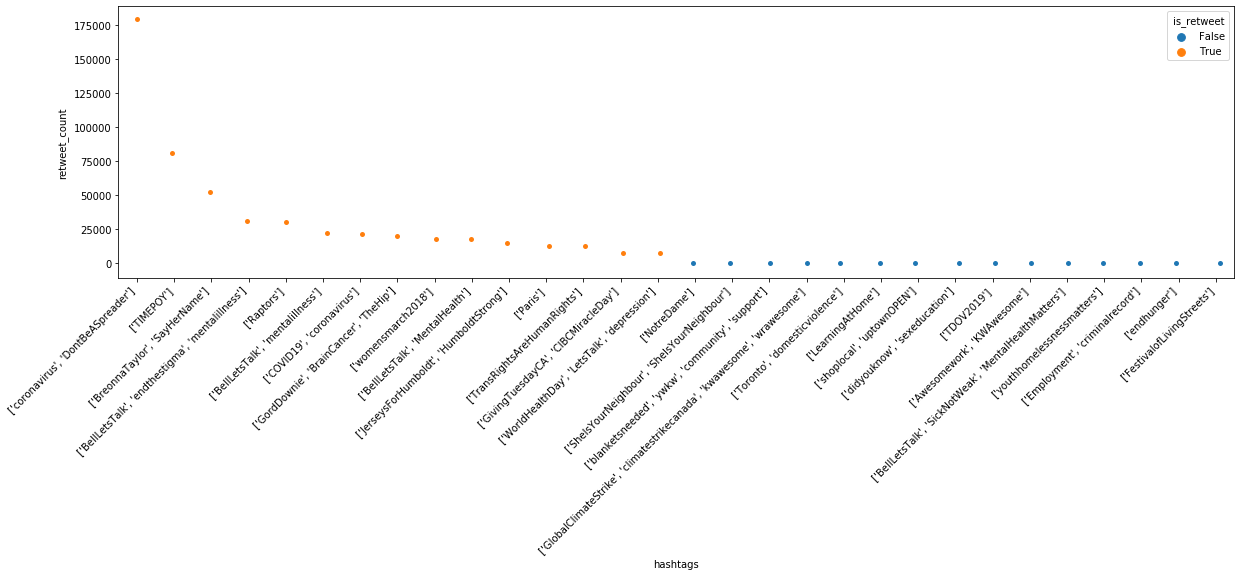

In [84]:
plt.figure(figsize=(20,5))

chart = sns.stripplot(x="hashtags",y="retweet_count",hue='is_retweet',data=df_hashtag_top_retweet_average)


chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')